
결측치 제거 후 데이터
     TV  Radio  Newspaper  Sales
0 230.1   37.8       69.2   22.1
1  44.5   39.3       45.1   10.4
2  17.2   45.9       69.3    9.3
3 151.5   41.3       58.5   18.5
4 180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
R-Squared 값(r2_score): 0.8994
R-Squared 값: 0.8994
예측판매량: 21.5


c:\pythonEdu\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\human-16\AppData\Local\Temp\ipykernel_9160\2726502473.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'r--',color='green')


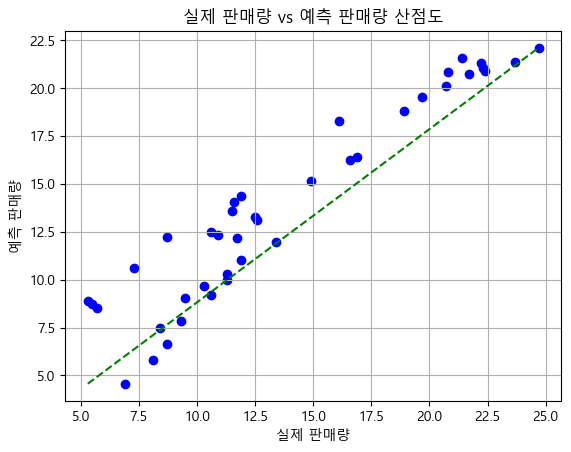

<Figure size 1000x600 with 0 Axes>

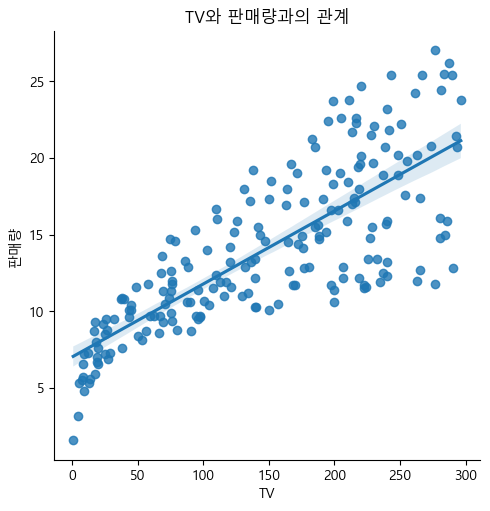

<Figure size 1000x600 with 0 Axes>

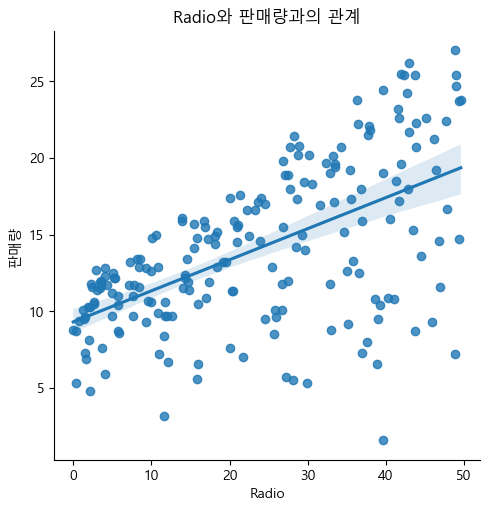

<Figure size 1000x600 with 0 Axes>

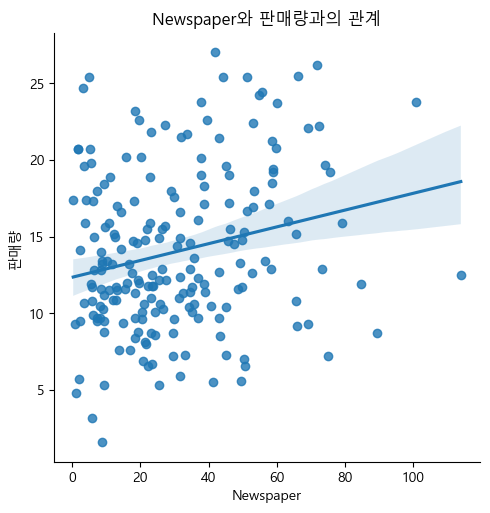

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.1f}'.format

# dataset/Advertising.csv 경로에서 데이터를 로드합니다.
file_path = 'dataset/Advertising.csv'
df = pd.read_csv(file_path)
#print("Advertising.csv 데이터")
#print(df.head())
#print(df.info())

# 불필요한 "Unnamed:0" 컬럼을 제거합니다.
unnamed_del_df = df.iloc[:,1:]
print("\n결측치 제거 후 데이터")
print(unnamed_del_df.head())
print(unnamed_del_df.info())

# 독립변수(X)는 'TV','Radio','Newspaper' 컬럼으로 설정합니다
X = unnamed_del_df.drop("Sales", axis=1)
#print(X)
# 종속변수(y)는 'Sales' 컬럼으로 설정합니다
y = unnamed_del_df["Sales"]
#print(y)

# 전체 데이처를 학습데이터와 테스트 데이터로 8:2 비율로 분할 합니다.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 선형 회귀 모델을 학습 데이터로 학습시킵니다.
model = LinearRegression()
model.fit(X_train,y_train)

# 테스트 데이터에 대한 판매량을 예측합니다.
y_pred = model.predict(X_test)
#print(y_pred)

# 테스트 데이터에 대한 R-squared (결정 계수) 값을 계산하여 모델 성능을 평가합니다. (scikit-learn의 r2_score 함수 사용)
print(f"R-Squared 값(r2_score): {r2_score(y_test,y_pred):.4f}")

# TV=200, Radio=50, Newspaper=30 일 때 판매량을 예측합니다.
new_data = np.array([[200.0, 50.0, 30.0]])
prediction = model.predict(new_data)

# 테스트 데이터에 대한 R-squared 값을 출력합니다.
print(f"R-Squared 값: {model.score(X_test,y_test):.4f}")
# 새로운 데이터에 대한 예측 판매량을 출력합니다.
print(f"예측판매량: {prediction[0]:.1f}")

# 시각화
# 실제 판매량 vs 예측 판매량 산점도: 테스트 데이터의 실제 판매량과 예측 판매량을 산점도로 시각화합니다. 
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],'r--',color='green')
# x축은 실제 판매량, y축은 예측 판매량으로 설정하고, 제목과 축 레이블을 명확하게 표시합니다.
plt.xlabel('실제 판매량')
plt.ylabel('예측 판매량')
plt.title("실제 판매량 vs 예측 판매량 산점도")
plt.grid(True)
plt.show()

# 각 독립변수와 판매량과의 관계 시각화: 각 독립 변수('TV', 'Radio', 'Newspaper')와 'Sales' 간의 산점도를 그리고, 회귀선을 추가하여 시각화합니다.
i=0
while i<3:
    #print(X.iloc[:,i].name)
    #plt.figure(figsize=(10,6))
    sns.lmplot(x=X.iloc[:,i].name, y="Sales", data=unnamed_del_df,palette="deep")
    plt.xlabel(X.iloc[:,i].name)
    plt.ylabel('판매량')
    plt.title(str(X.iloc[:,i].name)+"와 판매량과의 관계")
    plt.show()
    i+=1 
#sns.lmplot(x="TV", y="Sales", data=unnamed_del_df,palette="deep")
#plt.xlabel('TV')
#plt.ylabel('판매량')
#plt.title("TV와 판매량과의 관계")
#plt.show()

#sns.lmplot(x="Radio", y="Sales", data=unnamed_del_df,palette="deep")
#plt.xlabel('Radio')
#plt.ylabel('판매량')
#plt.title("Radio와 판매량과의 관계")
#plt.show()

#sns.lmplot(x="Newspaper", y="Sales", data=unnamed_del_df,palette="deep")
#plt.xlabel('Newspaper')
#plt.ylabel('판매량')
#plt.title("Newspaper와 판매량과의 관계")
#plt.show()